# Speed Dating 

In this project we analyze the Speed Dating experiment dataset from Kaggle ([Source](https://www.kaggle.com/annavictoria/speed-dating-experiment/data)) to understand what attributes or interests one looks for in a potential partner. 
We also analyze one's perception of what the opposite sex looks for in them and if this experiment affected their confidence.

## Dataset Description

### Study Summary
Students of Columbia University were recruited to participate in a study ([Study](http://faculty.chicagobooth.edu/emir.kamenica/documents/genderDifferences.pdf))to understand their dating behaviour. Students were randomly divided into 21 waves to study different settings. Each student had to fill out a signup form with their personal details and few questions and a follow-up form after the event to re-evaluate the same questions asked at signup.

Each student spent 4 minutes with every participant of the opposite sex in that wave. They were given a scorecard to rate their partner and give a 'yes' or a 'no' decision at the end of the four minutes.

When both participants say a 'yes' it is considered a 'match'.

In [ ]:
Key findings

In [ ]:
Assumptions

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import io
import requests
import datetime
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [170]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm
import sklearn.feature_selection as fs
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [171]:
data = pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1").rename(columns=lambda x: x.strip())

###  Descriptive Analysis

To better understand the partitipants and the nature of the dataset here are few charts :

In [172]:
descrp=data.copy()

In [173]:
#dropping duplicates for each participant 
descrp=descrp.drop_duplicates(subset='iid', keep='first', inplace=False)


#### a) Number of male and female participants in each wave

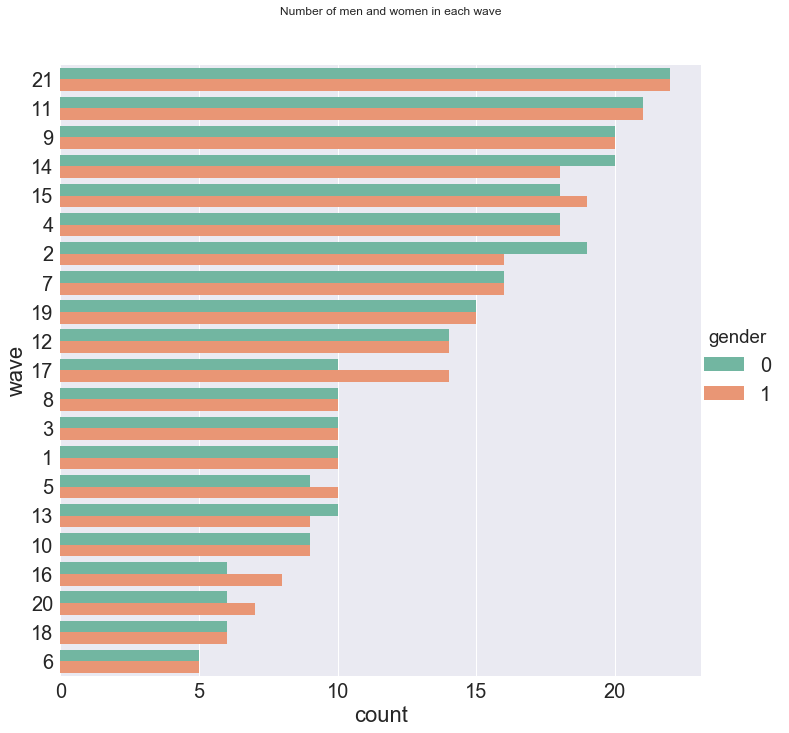

In [174]:
plot1= sns.factorplot(y="wave", hue='gender',data=descrp, size=10, kind="count", palette='Set2'\
                      ,orient='h',order=descrp['wave'].value_counts().index)
plt.subplots_adjust(top=0.9)
plot1.fig.suptitle('Number of men and women in each wave');

Most waves had equal number of men and women giving both the genders equal oppurtunity. Some waves like 2, 16, 17 had a disparity in their male and female numbers given one gender more choices to pick from .

#### b) Race of the participants

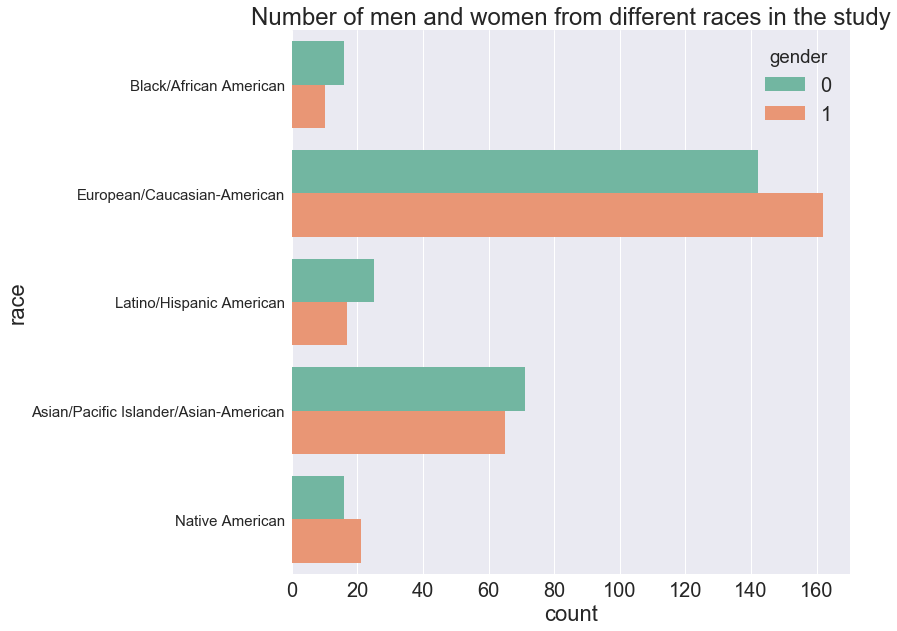

In [175]:

# the five races were
#race= ['Black/African American','European/Caucasian-American','Latino/Hispanic American',
        #'Asian/Pacific Islander/Asian-American','Native American','Other']

plot2 = plt.figure(figsize=(10,10))
plot2= sns.countplot(y='race',data=descrp, hue='gender',palette='Set2')
plot2.set(yticklabels=race)
plot2.set_title('Number of men and women from different races in the study');
g = plt.yticks(rotation=0,fontsize=15);

The participants of this study were mostly white. It is possible that there isn't a lot of diversity at Columbia university or the students most of the students who participated in this study were mostly white.
African Americans, Hispanics and Native Americans were the minorities in this study.

More white women participated in this experiment than white men.

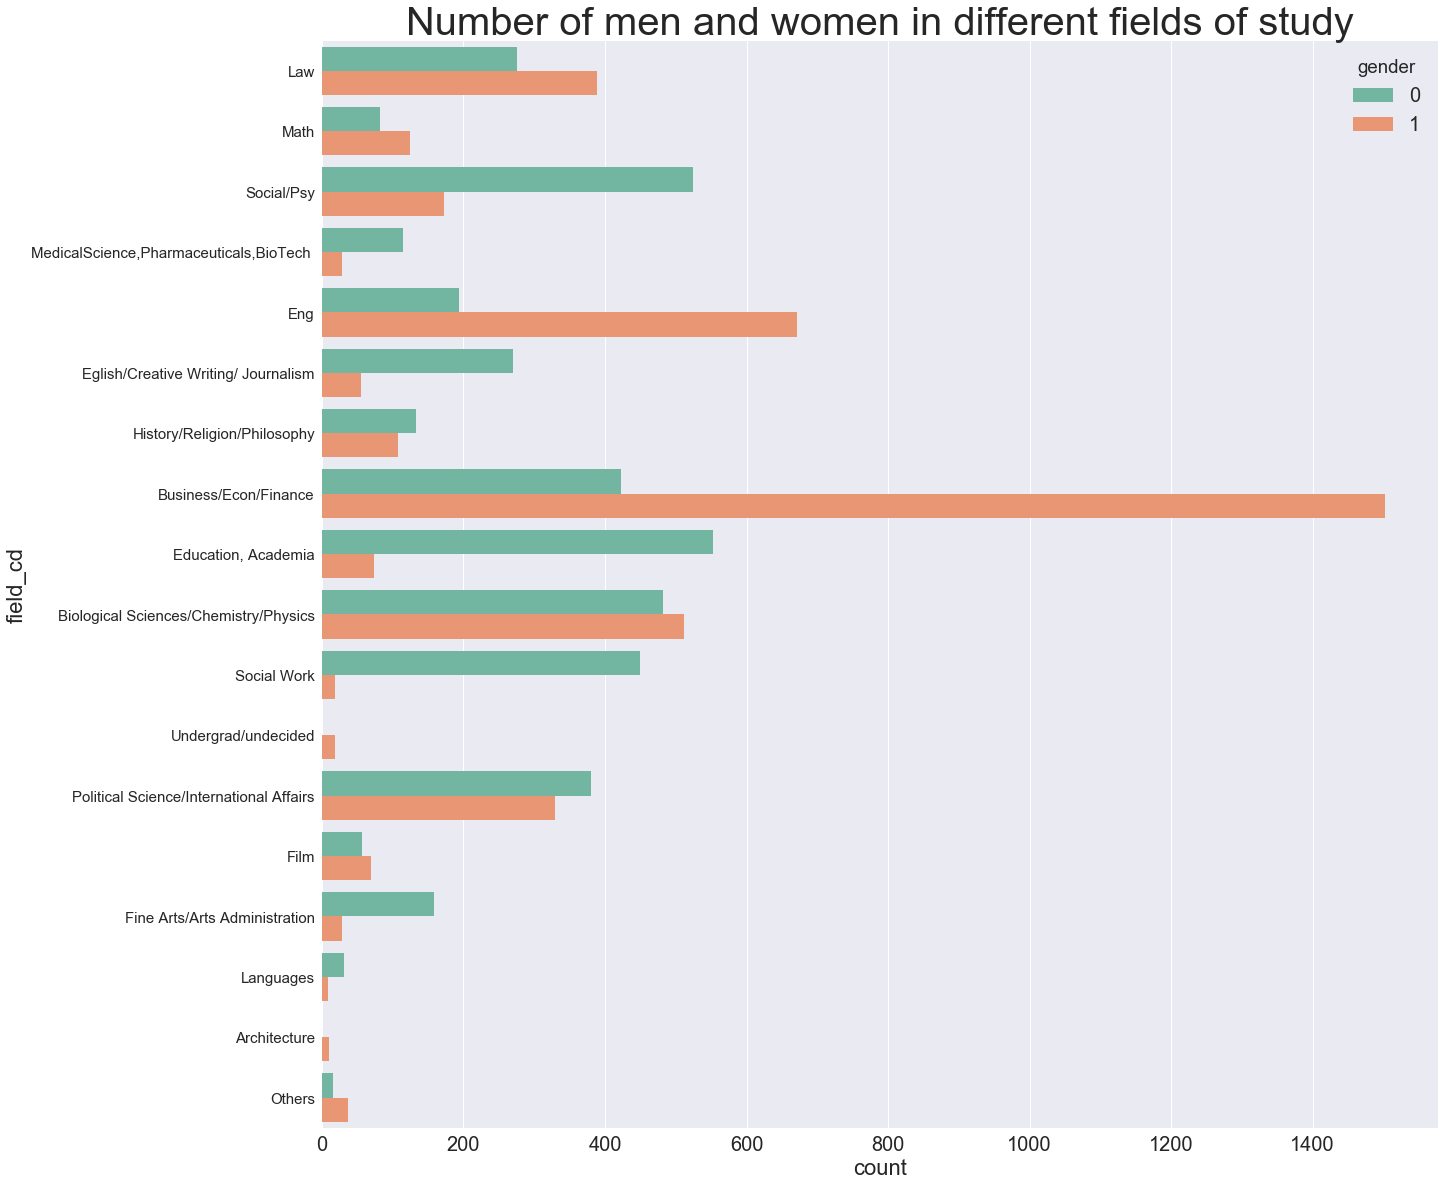

In [162]:
field_cd = ['Law','Math','Social/Psy','MedicalScience,Pharmaceuticals,BioTech ',
                   'Eng','Eglish/Creative Writing/ Journalism','History/Religion/Philosophy',
                  'Business/Econ/Finance','Education, Academia','Biological Sciences/Chemistry/Physics',
                  'Social Work','Undergrad/undecided','Political Science/International Affairs',
                  'Film','Fine Arts/Arts Administration','Languages','Architecture','Others']
plot3 = plt.figure(figsize=(20,20))
plot3 = sns.countplot(y="field_cd",data=descrp, hue='gender', palette="Set2")
plot3.set(yticklabels=field_cd)
plot3.set_title('Number of men and women in different fields of study', fontsize=40)
plot3 =plt.yticks(rotation=0,fontsize=15);

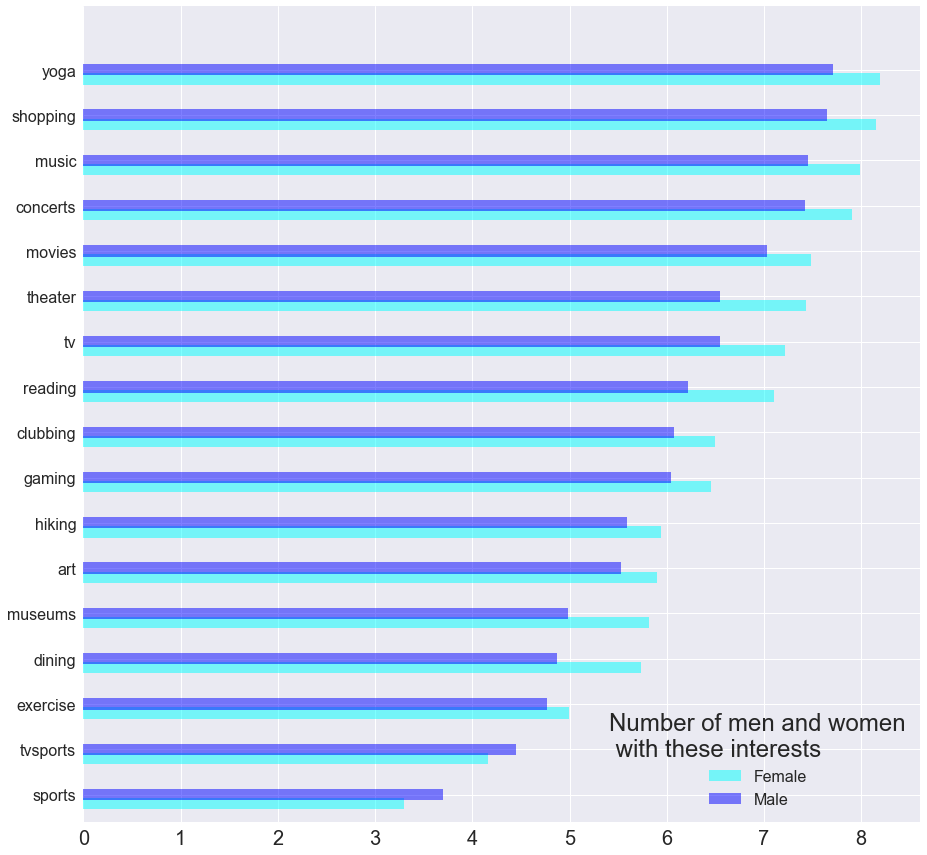

In [149]:
#interests in general men and women like to do 

interests=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
int_act = descrp.groupby(['gender']).mean()[interests].values 
int_act=np.sort(int_act) # sorting 
plot4= plt.figure(figsize=(15,15))
plot4= plt.barh(np.arange(0,2*temp.shape[1],2)-0.2,temp[0,:], height=0.5,color=[0,1,1],alpha=0.5,label='Female')
plot4 = plt.barh(np.arange(0,2*temp.shape[1],2)+0.2,temp[1,:], height=0.5,color=[0,0,1],alpha=0.5,label='Male')
plot4 = plt.yticks(np.arange(0,2*temp.shape[1],2)+0.2,activities_interested,fontsize=16)
plot4 = plt.ylim(-1,2*temp.shape[1]+1)
plot4 = plt.legend(loc=4,fontsize=16)

plot4.set_title('Number of men and women\n with these interests');

## <u>Cleanning data </u>

In [10]:
sd_org=data.copy()

According to the paper, "Seven waves have been omitted: one because we imposed a maximum number of acceptances, two because we were unable to attract sufficient participants, and four because they involved an experimental intervention where participants were asked to bring their favorite book." We identified those 7 waves based data key provided and exluded them.

In [11]:
# select waves that had been used in the paper 
wave=[6,12,16,18,19,20,21]
sd = sd_org[~sd_org['wave'].isin(wave)]
sd.wave.unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 15, 17], dtype=int64)

In [12]:
# convert income to numeric values
sd['income'] = sd['income'].str.replace(',', '')
sd['income']= pd.to_numeric(sd['income'])

C:\Users\falih\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\falih\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Drop those colunms for 'half way through' phase 
sd= sd.drop(['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',
             'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s'],axis=1)

In [14]:
# Drop those colunms for 'follow-up 2' phase, becuase these were filled out after 3-4 
# weeks after the event. A lot of them were NaN values and we think that participants 
# might not remember very clearly by that time. 

sd= sd.drop(['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3',
             'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3',
             'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
             'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3',
             'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3', 
             'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3',],axis=1)

In [15]:
# Drop attr7_2, because it doesn't pair up with the question asked in the correspoding sign up phase.
sd= sd.drop('attr7_2',axis=1)

In [16]:
# Drop those columns that won't be used in this analysis 
sd= sd.drop(['id', 'idg', 'wave','round','condtn', 'position', 'positin1','partner','pid','int_corr',
             'age_o','race_o','from','zipcode','career','career_c','satis_2','length',
             'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','field',
             'undergra','mn_sat','tuition','exphappy','expnum','numdat_2','samerace',
             'match_es','you_call','them_cal','date_3','numdat_3','num_in_3'],axis=1)

In [17]:
# group those attributes suing 1-10 scales
ten = ['attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1',
       'fun5_1', 'amb5_1','attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2',
       'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']

# group those attributes using 100 point system
hrd = ['attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1',
       'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1',
       'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1','sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2',
       'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2',
       'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2',
       'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2',
       'shar2_2']

In [18]:
# Normalize two different scales 

# Normalize 10 point scale
sd[ten]=sd[ten].apply(lambda x: ((x-1)/9))

# Normalize 100 point scale
sd[hrd]=sd[hrd].apply(lambda x: x/100)

In [19]:
# final columns to keep 
sd.columns

Index(['iid', 'gender', 'order', 'match', 'dec_o', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=111)

### Description of the columns <br><br>


| Column | Description |
|--------|-------------|
|`dec_o`|1 = yes, 0 = no|
|`sports`|scale of 1-10|
|`tvsports`| scale of 1-10|
|`exercise`| scale of 1-10|
|`dining`| scale of 1-10|
|`museums`| scale of 1-10|
|`art`| scale of 1-10|
|`hiking`| scale of 1-10|
|`gaming`|scale of 1-10|
|`clubbing`|scale of 1-10|
|`reading`|scale of 1-10|
|`tv`|scale of 1-10|
|`theater`|scale of 1-10|
|`movies`|scale of 1-10|
|`music`|scale of 1-10|
|`shopping`|scale of 1-10|
|`yoga`|scale of 1-10|


### ### What do you look for in the opposite sex SIGNUP vs FOLLOWUP

Six attributes were asked to be ranked by each participant-  Attractive, Sincere,Intelligent,Fun,Ambitious and Shared Interests.
We wanted to know which attributes were given the most points by men and women at signup and followup to see if there are any differences in the gender or the two different times of the experiment.

In [20]:
#picking columns for the attributes from q1
signup=sd[['iid','gender','attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1']]
followup=sd[['iid','gender','attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2']]



In [21]:
#dropping any null values
signup=signup.dropna(axis=0,how='any')

followup=followup.dropna(axis=0,how='any')


In [22]:
#each participant filled out only one form at signup and followup , but met multiple people,
#hence the form values were duplicated in the dataset

#removing duplicate values
signup=signup.drop_duplicates(subset=None, keep='first', inplace=False)

followup=followup.drop_duplicates(subset=None, keep='first', inplace=False)


In [43]:
#melting the dataset to transfrom the 6 columns into 1
signupmelt=pd.melt(signup,id_vars=['gender'], value_vars=['attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1'], var_name ='Attributes', value_name = 'AttributeValue')


followupmelt=pd.melt(followup,id_vars=['gender'], value_vars=['attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2'], var_name ='Attributes', value_name = 'AttributeValue')


TypeError: 'method' object is not subscriptable

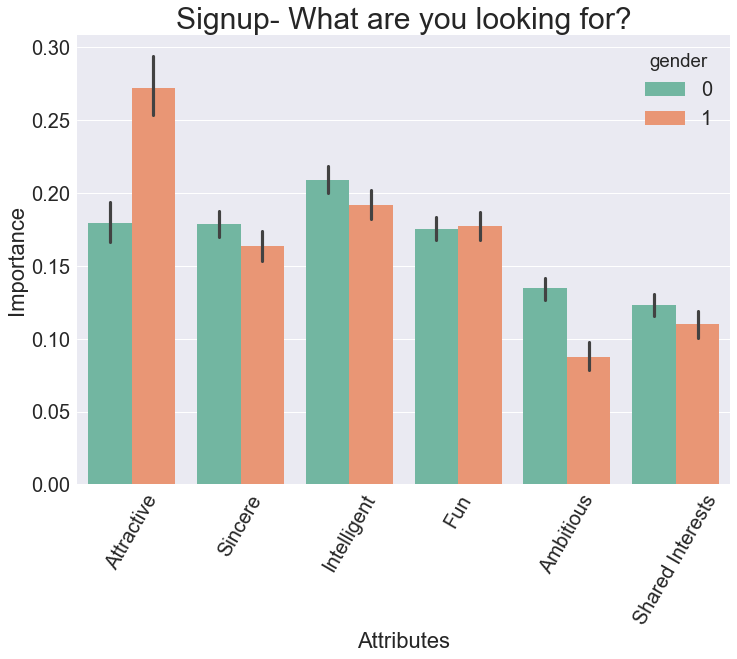

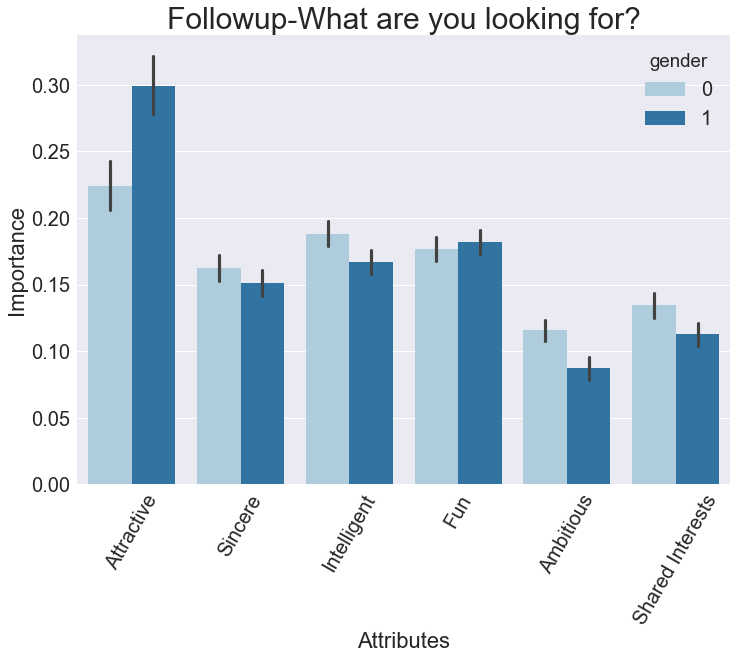

In [44]:
#plotting the highest rated attribute for signup and follow up

sns.set(font_scale = 2) #increasing the plot size
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


plot5 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=signupmelt ,palette="Set2")
plot5.set(xlabel='Attributes', ylabel='Importance')
plot5.set_title("Signup- What are you looking for?",fontsize=30)
plot5.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests'])#renaming the x axis ticks
plot5.set_xticklabels(plot5.get_xticklabels(),rotation=60)
plt.show();



#plotting the followup data
a4_dims = (11.7, 8.27) 
fig, ax = pyplot.subplots(figsize=a4_dims) 

plot6 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=followupmelt, palette="Paired")
plot6.set(xlabel='Attributes', ylabel='Importance')
plot6.set_title("Followup-What are you looking for?", fontsize=30)
plot6.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests']) 
plot6.set_xticklabels(plot6.get_xticklabels(),rotation=60)
plt.show();

## Feature Selection for Men and Women at Signup vs Followup

#### Men

In [ ]:
male=sd[sd.gender==1]

In [ ]:
malesignup=male[['match','attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1']]
malefollowup=male[['match','attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2']]

In [ ]:
malesignup=malesignup.dropna(axis=0,how='any')
malefollowup=malefollowup.dropna(axis=0,how='any')

In [ ]:
X1, y1 = malesignup.drop(['match'], axis=1), malesignup['match']
X2, y2 = malefollowup.drop(['match'], axis=1), malefollowup['match']

In [ ]:
#signup
kb = fs.SelectKBest(k=3)
kb.fit(X1, y1)  
names = X1.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sorting the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)



In [ ]:
#followup
kb = fs.SelectKBest(k=3)
kb.fit(X2, y2)
names = X2.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sorting the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

#### Women

In [ ]:
female=sd[sd.gender==0]

In [ ]:
femalesignup=female[['match','attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1']]

femalefollowup=female[['match','attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2']]

In [ ]:
femalesignup=femalesignup.dropna(axis=0,how='any')
femalefollowup=femalefollowup.dropna(axis=0,how='any')

In [ ]:
X3,y3= femalesignup.drop(['match'], axis=1), femalesignup['match']
X4, y4 = femalefollowup.drop(['match'], axis=1), femalefollowup['match']

In [ ]:
kb = fs.SelectKBest(k=3)
kb.fit(X3, y3)  
names = X3.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
kb = fs.SelectKBest(k=3)
kb.fit(X4, y4) 
names = X4.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

## What do you think the opposite sex looks for 

In [ ]:
#picking columns for the attributes from question 2
signup2=sd[['iid','gender','attr2_1','sinc2_1','intel2_1','fun2_1',\
        'amb2_1','shar2_1']]
followup2=sd[['iid','gender','attr2_2','sinc2_2','intel2_2','fun2_2',\
        'amb2_2','shar2_2']]

In [ ]:
#dropping any null values
signup2=signup2.dropna(axis=0,how='any')

followup2=followup2.dropna(axis=0,how='any')


In [ ]:
#each participant filled out only one form at signup and followup , but met multiple people,
#hence the form values were duplicated in the dataset

#removing duplicate valyes
signup2=signup2.drop_duplicates(subset=None, keep='first', inplace=False)

followup2=followup2.drop_duplicates(subset=None, keep='first', inplace=False)



In [ ]:
#melting the dataset to transfrom the 6 columns into 1
signupmelt2=pd.melt(signup2,id_vars=['gender'], value_vars=['attr2_1','sinc2_1','intel2_1','fun2_1',\
        'amb2_1','shar2_1'], var_name ='Attributes', value_name = 'AttributeValue')


followupmelt2=pd.melt(followup2,id_vars=['gender'], value_vars=['attr2_2','sinc2_2','intel2_2','fun2_2',\
        'amb2_2','shar2_2'], var_name ='Attributes', value_name = 'AttributeValue')


In [ ]:
#plotting the highest rated attribute for signup and follow up

sns.set(font_scale = 2) #increasing the plot size
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


plot7 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=signupmelt2,palette="Set2")
plot7.set(xlabel='Attributes', ylabel='Importance')
plot7.set_title("Signup- What do you think opp sex is you looking for?",fontsize=20)
plot7.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests'])#renaming the x axis ticks
plot7.set_xticklabels(plot1.get_xticklabels(),rotation=60)
plt.show();



#plotting the followup data
a4_dims = (11.7, 8.27) 
fig, ax = pyplot.subplots(figsize=a4_dims) 

plot8 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=followupmelt2, palette="Paired")
plot8.set(xlabel='Attributes', ylabel='Importance')
plot8.set_title("Followup-What do you think opp sex is you looking for?",fontsize=20)
plot8.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests']) 
plot8.set_xticklabels(plot2.get_xticklabels(),rotation=60)
plt.show();

 ## How do measure up signup vs followup?

In [ ]:
#picking columns for the attributes from question 2
signup3=sd[['iid','gender','attr3_1','sinc3_1','intel3_1','fun3_1',\
        'amb3_1']]
followup3=sd[['iid','gender','attr3_2','sinc3_2','intel3_2','fun3_2',\
        'amb3_2']]

In [ ]:
#dropping any null values
signup3=signup3.dropna(axis=0,how='any')

followup3=followup3.dropna(axis=0,how='any')

In [ ]:
#each participant filled out only one form at signup and followup , but met multiple people,
#hence the form values were duplicated in the dataset

#removing duplicate valyes
signup3=signup3.drop_duplicates(subset=None, keep='first', inplace=False)

followup3=followup3.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
#melting the dataset to transfrom the 6 columns into 1
signupmelt3=pd.melt(signup3,id_vars=['gender'], value_vars=['attr3_1','sinc3_1','intel3_1','fun3_1',\
        'amb3_1'], var_name ='Attributes', value_name = 'AttributeValue')


followupmelt3=pd.melt(followup3,id_vars=['gender'], value_vars=['attr3_2','sinc3_2','intel3_2','fun3_2',\
        'amb3_2'], var_name ='Attributes', value_name = 'AttributeValue')
signupmelt3.head()
followupmelt3.head()

In [ ]:
#plotting the highest rated attribute for signup and follow up

#sns.set(font_scale = 2) #increasing the plot size
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


plot7 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=signupmelt3,palette="Set2")
plot7.set(xlabel='Attributes', ylabel='Importance')
plot7.set_title("Signup- What do you think opp sex is you looking for?",fontsize=20)
plot7.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious'])#renaming the x axis ticks
plot7.set_xticklabels(plot1.get_xticklabels(),rotation=60)

plt.show();



#plotting the followup data
a4_dims = (11.7, 8.27) 
fig, ax = pyplot.subplots(figsize=a4_dims) 

plot8 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=followupmelt3, palette="Paired")
plot8.set(xlabel='Attributes', ylabel='Importance')
plot8.set_title("Followup-What do you think opp sex is you looking for?",fontsize=20)
plot8.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious']) 
plot8.set_xticklabels(plot2.get_xticklabels(),rotation=60)

plt.show();

### <u>Clustering</u>


We wanted to cluster the dataset using participants' interests and character attributes from the sign up phase. Our initial approach was to check the correlations among these variables and dropped one variable in pairs with high correlations.

In [ ]:
# features we want to include in our analysis for sign up phase
features =['gender','match','order','age','field_cd','race','imprace','imprelig','date','go_out',
           'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
           'clubbing','reading','tv','theater','movies','music','shopping','yoga',
           'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
           'attr2_1', 'sinc2_1','intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1',
           'sinc3_1','fun3_1', 'intel3_1', 'amb3_1']

In [ ]:
# correlations between features
sd[features].corr().head()

In [ ]:
# heatmap of the correlations
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(sd[features].corr(),linewidths=.5, ax=ax)

In [ ]:
# drop one feature in the pairs that have high correlations
keep =['gender','match','order','age','field_cd','race','imprace','income','date',
       'exercise','museums','hiking','gaming','clubbing','reading','tv','music','yoga',
       'sinc1_1', 'intel1_1','fun1_1', 'amb1_1', 'shar1_1','intel2_1', 'fun2_1',
       'sinc3_1','fun3_1', 'intel3_1']

In [ ]:
# run the heat map again to make sure the correlations are within a reasonable range 
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(sd[keep].corr(),linewidths=.5, ax=ax)

We decided to drop all NaN values instead of imputing them in some way, because these are all personal preference rankings, it doesn't make sense to impose the mean or median of other people's ranking to a specific participant who was either unwilling or unable to give the ranking at the time. 

In [ ]:
# drop all NaN values 
temp1 = sd[keep].dropna()

We compared 3 different clustering models using different numbers of clusters and trying to pick the best one. 

In [ ]:
# we got this code from Michele Samorani's Phython class note. See reference at the bottom.
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), 
            AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(temp1)
        sil = metrics.silhouette_score(temp1, res.labels_)
        print (str(cl)[:10] + ' with k =' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl

The results are very close. We were expecting something over 0.7 to give us better clusters. The number shows that KMeans with cluster of 3 is the best option here. 

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
cluster = kmeans.fit_predict(temp1)

In [ ]:
temp1['cluster']=cluster

In [ ]:
temp1.groupby('cluster').mean()

The result was not that good. It did not give a fairly clear cluster. Also since our dateset has already been labeled, we decided to move to classification instead of clustering. 

### <u>Classification</u>

#### Interests

We wanted to see how your interests influence your partner's decision. We did this on two race groups to find out whether the interests that got you partner to say yes changed among different races. 

In [ ]:
# select interests
interest = ['dec_o','sports','tvsports','exercise','dining','museums','art','hiking',
            'gaming','clubbing','reading','tv','theater','movies','music','shopping',
            'yoga']

Classification over interest on major race group: European/Caucasian-American

In [ ]:
# include waves 1-14
# Majority group & interest 
wave_m_i = sd[sd['race']==2].loc[:, interest]

In [ ]:
# check how many rows we have 
len(wave_m_i)
# see if there is any NaN values
wave_m_i.isnull().sum()

In [ ]:
# drop all NaN values
wave_m_i=wave_m_i.dropna(axis=0, how='any')

In [ ]:
# define our X and y
X_m_i, y_m_i = wave_m_i.drop(['dec_o'], axis=1), wave_m_i['dec_o']

kb = fs.SelectKBest(k=5)
kb.fit(X_m_i, y_m_i)

names = X_m_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
# best interests according to kbest
interest_best = ['dec_o','dining','clubbing','shopping','exercise','reading']

wave_m_i = sd[sd['race']==2].loc[:, interest_best]

In [ ]:
wave_m_i=wave_m_i.dropna(axis=0, how='any')

In [ ]:
# define X and y
X_m_i, y_m_i = wave_m_i.drop(['dec_o'], axis=1), wave_m_i['dec_o']
# to see the distribution of y 
len(wave_m_i[wave_m_i['dec_o']==1])
len(wave_m_i[wave_m_i['dec_o']==0])

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_i, y_m_i)
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_i.columns),  
                       
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                      
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

Classification over interest on minor race group: Black/African American and Native American

In [ ]:
wave_n_i = sd[(sd['race']==1)|(sd['race']==5)].loc[:, interest]

In [ ]:
wave_n_i=wave_n_i.dropna(axis=0, how='any')

X_n_i, y_n_i = wave_n_i.drop(['dec_o'], axis=1), wave_n_i['dec_o']

kb = fs.SelectKBest(k=5)
kb.fit(X_n_i, y_n_i)

In [ ]:
# list out the 5 interests that Kbest chose
names = X_n_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
# best interests according to kbest
interest_best = ['dec_o','hiking','museums','art','reading','yoga']
wave_n_i = sd[(sd['race']==1)|(sd['race']==5)].loc[:, interest_best]

In [ ]:
wave_n_i=wave_n_i.dropna(axis=0, how='any')

In [ ]:
# define X and y
X_n_i, y_n_i = wave_n_i.drop(['dec_o'], axis=1), wave_n_i['dec_o']
# to see the distribution of y
len(wave_n_i[wave_n_i['dec_o']==1])
len(wave_n_i[wave_n_i['dec_o']==0])

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_i, y_n_i)

In [ ]:
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_i.columns),  
                        #class_names = ['1.0' if i == 1 else '0.0' for i in y.unique()] ,
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

#### Attributes

We did the same thing over attributes to see how your partner's rating on you influence his/her decision. We also did this on two race groups to find out whether the attributes that got you partner to say yes changed among different races. 

Classification over attributes on major race group: European/Caucasian-American

In [ ]:
attributes=['dec_o','gender','attr_o', 'sinc_o', 'intel_o','fun_o', 
            'amb_o', 'shar_o','prob_o','met_o']

In [ ]:
wave_m_a = sd[sd['race']==2].loc[:, attributes]

In [ ]:
wave_m_a=wave_m_a.dropna(axis=0, how='any')

In [ ]:
# define X and y
X_m_a, y_m_a = wave_m_a.drop(['dec_o'], axis=1), wave_m_a['dec_o']

In [ ]:
kb = fs.SelectKBest(k=4)
kb.fit(X_m_a, y_m_a)

names = X_m_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
# best attributes according to kbest
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']

In [ ]:
wave_m_a = sd[sd['race']==2].loc[:, attributes_best]

In [ ]:
wave_m_a=wave_m_a.dropna(axis=0, how='any')

In [ ]:
X_m_a, y_m_a = wave_m_a.drop(['dec_o'], axis=1), wave_m_a['dec_o']
# distribution of y
len(wave_m_a[wave_m_a['dec_o']==1])
len(wave_m_a[wave_m_a['dec_o']==0])

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_a, y_m_a)

dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_a.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

Classification over attributes on minor race group: Black/African American and Native American

In [ ]:
wave_n_a = sd[(sd['race']==1)|(sd['race']==5)].loc[:, attributes]

In [ ]:
wave_n_a=wave_n_a.dropna(axis=0, how='any')
# define X and y
X_n_a, y_n_a = wave_n_a.drop(['dec_o'], axis=1), wave_n_a['dec_o']

In [ ]:
kb = fs.SelectKBest(k=4)
kb.fit(X_n_a, y_n_a)

names = X_n_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
# best attributes according to kbest
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']
wave_n_a = sd[(sd['race']==1)|(sd['race']==5)].loc[:, attributes_best]

In [ ]:
wave_n_a=wave_n_a.dropna(axis=0, how='any')

In [ ]:
# define X and y
X_n_a, y_n_a = wave_n_a.drop(['dec_o'], axis=1), wave_n_a['dec_o']
# distribution of y
len(wave_n_a[wave_n_a['dec_o']==1])
len(wave_n_a[wave_n_a['dec_o']==0])

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_a, y_n_a)


dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_a.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

As we can see the ginis for interest classification on the major race group are all close to 0.5. In order to get better classification, we will further divide the major race group into people who rated exercise greater or equal to 6.5 and those less than 6.5. Then run the classification on attributes. 

In [ ]:
# major race group who rated exercise >= 6.5
exercise = sd[(sd['race']==2) & (sd['exercise']>=6.5)]
# major race group who rated exercise < 6.5
exercise1 = sd[(sd['race']==2) & (sd['exercise']<6.5)]

In [ ]:
exercise=exercise.loc[:, attributes]


In [ ]:
exercise=exercise.dropna(axis=0, how='any')

In [ ]:
X_m_e, y_m_e = exercise.drop(['dec_o'], axis=1), exercise['dec_o']

In [ ]:
kb = fs.SelectKBest(k=4)
kb.fit(X_m_e, y_m_e)

names = X_m_e.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']
exercise =exercise.loc[:, attributes_best]

In [ ]:
exercise=exercise.dropna(axis=0, how='any')

In [ ]:
X_m_e, y_m_e = exercise.drop(['dec_o'], axis=1), exercise['dec_o']

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_e, y_m_e)


dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_e.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

# Reference

Clustering: https://github.com/samorani/Data-Science-Analysis-with-Python


In [ ]:
Descriptive analysis : https://www.kaggle.com/piecurus/a-gender-perspective-of-participants

In [ ]:
https://seaborn.pydata.org/generated/seaborn.countplot.html